- Use data from here: AA_MicroscopyImage_20241204
- This notebook is to form the vesicles forming results with new condition: any spot notice the vesicle, sample will treated as having vesicles

In [1]:
import os
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Data construction

In [2]:
df = pd.read_csv('/Users/haoliu/Documents/GitHub/MicroscopyAnalysis/Results_Plate_20241204_2_1/Plate_20241204_2_1_VesiclesSummary.csv')
df

,filename,num_vesicles,area_vesicles,area_percent
0,WellK08_PointK08_0002_ChannelNile Red_Seq0662....,0,0.000000,0.000000
1,WellH04_PointH04_0003_ChannelNile Red_Seq0475....,0,0.000000,0.000000
2,WellJ07_PointJ07_0001_ChannelNile Red_Seq0621....,0,0.000000,0.000000
3,WellJ13_PointJ13_0000_ChannelNile Red_Seq0596....,0,0.000000,0.000000
4,WellF10_PointF10_0003_ChannelNile Red_Seq0291....,0,0.000000,0.000000
...,...,...,...,...
763,WellL17_PointL17_0002_ChannelNile Red_Seq0742....,0,0.000000,0.000000
764,WellJ08_PointJ08_0000_ChannelNile Red_Seq0616....,0,0.000000,0.000000
765,WellE09_PointE09_0003_ChannelNile Red_Seq0187....,25,26186.745564,0.024974
766,WellE15_PointE15_0000_ChannelNile Red_Seq0208....,0,0.000000,0.000000


In [5]:
df_sorted = df.sort_values(by='filename')

# Extract the part before the first '_' in 'filename'
df_sorted['group'] = df_sorted['filename'].str.split('_').str[0]

# Group by 'group', take median of other columns, and keep the first row
df_final = df_sorted.groupby('group').agg({
    'filename': 'first',
    'num_vesicles': 'sum',
    'area_vesicles': 'sum',
    'area_percent': 'sum'
}).reset_index(drop=True)

# Round num_vesicles to integer
df_final['num_vesicles'] = df_final['num_vesicles'].round().astype(int)
# By default, round() uses "round half to even" (also known as "bankers' rounding") 
# Extracting positions from filename column
df_final['position'] = df_final['filename'].str.extract(r'Well([A-Z]+\d+)_')

# Dropping the original filename column
df_final = df_final[['position', 'num_vesicles', 'area_vesicles', 'area_percent']]
df_final

,position,num_vesicles,area_vesicles,area_percent
0,C03,0,0.000000,0.00000
1,C04,0,0.000000,0.00000
2,C05,0,0.000000,0.00000
3,C06,0,0.000000,0.00000
4,C07,0,0.000000,0.00000
...,...,...,...,...
187,L18,0,0.000000,0.00000
188,L19,4,2988.440012,0.00285
189,L20,0,0.000000,0.00000
190,L21,0,0.000000,0.00000


In [7]:
df2 = pd.read_csv('/Users/haoliu/Documents/GitHub/MicroscopyAnalysis/Results_Plate_20241204_3_1/Plate_20241204_3_1_VesiclesSummary.csv')
df2

,filename,num_vesicles,area_vesicles,area_percent
0,WellD15_PointD15_0003_ChannelNile Red_Seq0111....,9,3736.924461,0.003564
1,WellE17_PointE17_0002_ChannelNile Red_Seq0218....,0,0.000000,0.000000
2,WellE14_PointE14_0002_ChannelNile Red_Seq0206....,0,0.000000,0.000000
3,WellC08_PointC08_0001_ChannelNile Red_Seq0021....,0,0.000000,0.000000
4,WellC21_PointC21_0003_ChannelNile Red_Seq0075....,0,0.000000,0.000000
...,...,...,...,...
251,WellD17_PointD17_0001_ChannelNile Red_Seq0101....,0,0.000000,0.000000
252,WellC07_PointC07_0000_ChannelNile Red_Seq0016....,0,0.000000,0.000000
253,WellD05_PointD05_0000_ChannelNile Red_Seq0148....,0,0.000000,0.000000
254,WellE09_PointE09_0003_ChannelNile Red_Seq0187....,0,0.000000,0.000000


In [8]:
df_sorted = df2.sort_values(by='filename')

# Extract the part before the first '_' in 'filename'
df_sorted['group'] = df_sorted['filename'].str.split('_').str[0]

# Group by 'group', take median of other columns, and keep the first row
df_final2 = df_sorted.groupby('group').agg({
    'filename': 'first',
    'num_vesicles': 'sum',
    'area_vesicles': 'sum',
    'area_percent': 'sum'
}).reset_index(drop=True)

# Round num_vesicles to integer
df_final2['num_vesicles'] = df_final2['num_vesicles'].round().astype(int)
# By default, round() uses "round half to even" (also known as "bankers' rounding") 
# Extracting positions from filename column
df_final2['position'] = df_final2['filename'].str.extract(r'Well([A-Z]+\d+)_')

# Dropping the original filename column
df_final2 = df_final2[['position', 'num_vesicles', 'area_vesicles', 'area_percent']]
df_final2

,position,num_vesicles,area_vesicles,area_percent
0,C03,4,2068.738762,0.001973
1,C04,0,0.000000,0.000000
2,C05,7,4858.473039,0.004633
3,C06,7,2741.039590,0.002614
4,C07,0,0.000000,0.000000
...,...,...,...,...
59,E22,0,0.000000,0.000000
60,F19,0,0.000000,0.000000
61,F20,3,6451.260514,0.006152
62,F21,0,0.000000,0.000000


In [9]:
df_final2.loc[df_final2.index[:], 'position'] = df_final2.loc[df_final2.index[:], 'position'].apply(lambda x: f"{x}-2")
df_final2

,position,num_vesicles,area_vesicles,area_percent
0,C03-2,4,2068.738762,0.001973
1,C04-2,0,0.000000,0.000000
2,C05-2,7,4858.473039,0.004633
3,C06-2,7,2741.039590,0.002614
4,C07-2,0,0.000000,0.000000
...,...,...,...,...
59,E22-2,0,0.000000,0.000000
60,F19-2,0,0.000000,0.000000
61,F20-2,3,6451.260514,0.006152
62,F21-2,0,0.000000,0.000000


In [10]:
df_final_com = pd.concat([df_final, df_final2])
df_final_com

,position,num_vesicles,area_vesicles,area_percent
0,C03,0,0.000000,0.000000
1,C04,0,0.000000,0.000000
2,C05,0,0.000000,0.000000
3,C06,0,0.000000,0.000000
4,C07,0,0.000000,0.000000
...,...,...,...,...
59,E22-2,0,0.000000,0.000000
60,F19-2,0,0.000000,0.000000
61,F20-2,3,6451.260514,0.006152
62,F21-2,0,0.000000,0.000000


In [11]:
df_env_edit = pd.read_csv('df_env_edit_2024121.csv')
df_env_edit

,position,Combination
0,C03,D-Alanine
1,C04,L-Alanine
2,C05,L-Proline
3,C06,L-Histidine
4,C07,L-Glutamic Acid
...,...,...
251,E22-2,"D-Alanine, L-Alanine, L-Histidine, L-Glutamic ..."
252,F19-2,"D-Alanine, L-Proline, L-Histidine, L-Glutamic ..."
253,F20-2,"L-Alanine, L-Proline, L-Histidine, L-Glutamic ..."
254,F21-2,"D-Alanine, L-Alanine, L-Proline, L-Histidine, ..."


In [12]:
# Merge the two DataFrames on the 'Position' column
df_combined = pd.merge(df_env_edit, df_final_com, on='position')
df_combined = df_combined[['position', 'num_vesicles', 'Combination']]

In [13]:
df_combined

,position,num_vesicles,Combination
0,C03,0,D-Alanine
1,C04,0,L-Alanine
2,C05,0,L-Proline
3,C06,0,L-Histidine
4,C07,0,L-Glutamic Acid
...,...,...,...
251,E22-2,0,"D-Alanine, L-Alanine, L-Histidine, L-Glutamic ..."
252,F19-2,0,"D-Alanine, L-Proline, L-Histidine, L-Glutamic ..."
253,F20-2,3,"L-Alanine, L-Proline, L-Histidine, L-Glutamic ..."
254,F21-2,0,"D-Alanine, L-Alanine, L-Proline, L-Histidine, ..."


In [14]:
df_combined.to_csv('df_combined_20241221.csv', index=False)

In [15]:
# exclude water control
df_combined = df_combined.iloc[0:-1,:]
df_combined

,position,num_vesicles,Combination
0,C03,0,D-Alanine
1,C04,0,L-Alanine
2,C05,0,L-Proline
3,C06,0,L-Histidine
4,C07,0,L-Glutamic Acid
...,...,...,...
250,E21-2,0,"D-Alanine, L-Alanine, L-Proline, L-Glutamic Ac..."
251,E22-2,0,"D-Alanine, L-Alanine, L-Histidine, L-Glutamic ..."
252,F19-2,0,"D-Alanine, L-Proline, L-Histidine, L-Glutamic ..."
253,F20-2,3,"L-Alanine, L-Proline, L-Histidine, L-Glutamic ..."


In [16]:
(df_combined['num_vesicles'] != 0).sum()/len(df_combined)

0.25098039215686274

In [17]:
# change output to binary
df_combined['num_vesicles'] = (df_combined['num_vesicles'] >= 1).astype(int)

/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_56469/2866834049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['num_vesicles'] = (df_combined['num_vesicles'] >= 1).astype(int)


In [18]:
df_combined['Combination_list'] = df_combined['Combination'].str.split(', ')
all_amino_acids = sorted({aa for sublist in df_combined['Combination_list'] for aa in sublist})
# Create a DataFrame for one-hot encoding
one_hot_encoded = pd.DataFrame(0, index=df_combined.index, columns=all_amino_acids)
# Fill in the one-hot encoded features
for idx, aa_list in enumerate(df_combined['Combination_list']):
    one_hot_encoded.loc[idx, aa_list] = 1
one_hot_encoded

/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_56469/2449237727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Combination_list'] = df_combined['Combination'].str.split(', ')


,D-Alanine,DL-Serine,L-Alanine,L-Cytosine,L-Glutamic Acid,L-Histidine,L-Proline,L-Valine
0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
250,1,1,1,1,1,0,1,1
251,1,1,1,1,1,1,0,1
252,1,1,0,1,1,1,1,1
253,0,1,1,1,1,1,1,1


In [19]:
df_model = pd.concat([one_hot_encoded, df_combined['num_vesicles']], axis=1)
df_model

,D-Alanine,DL-Serine,L-Alanine,L-Cytosine,L-Glutamic Acid,L-Histidine,L-Proline,L-Valine,num_vesicles
0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
250,1,1,1,1,1,0,1,1,0
251,1,1,1,1,1,1,0,1,0
252,1,1,0,1,1,1,1,1,0
253,0,1,1,1,1,1,1,1,1


In [20]:
df_model.num_vesicles.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [21]:
df_model.to_csv('df_model_20241221.csv', index = False)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
X = df_model.iloc[:, :-1]  
y = df_model['num_vesicles']  

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight="balanced")
model.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        38
           1       0.33      0.15      0.21        13

    accuracy                           0.71        51
   macro avg       0.54      0.52      0.51        51
weighted avg       0.65      0.71      0.66        51

Confusion Matrix:
[[34  4]
 [11  2]]


In [25]:
amino_acid_presence = df_model[df_model['num_vesicles'] == 1].iloc[:, :-1].sum(axis=0).sort_values(ascending=False)
print(amino_acid_presence)

L-Cytosine         45
L-Valine           45
L-Proline          40
D-Alanine          39
DL-Serine          39
L-Glutamic Acid    35
L-Histidine        35
L-Alanine          31
dtype: int64


In [50]:
64/255

0.25098039215686274

<Axes: >

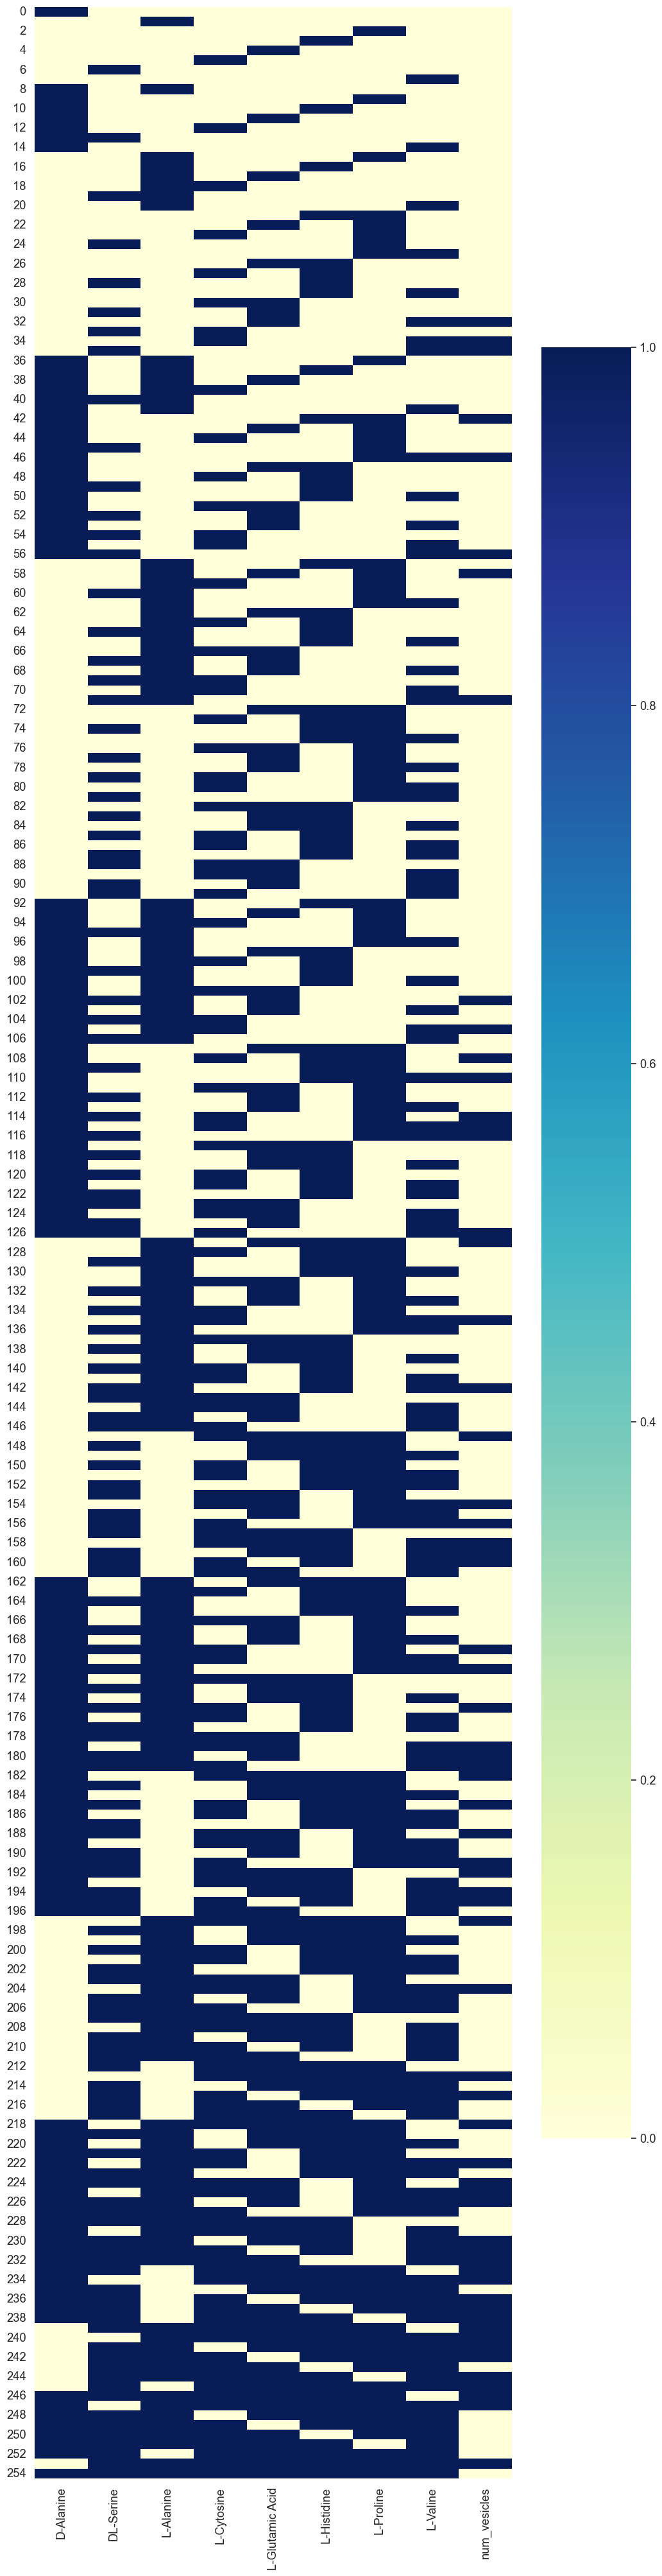

In [42]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 50))
sns.heatmap(df_model, fmt=".0f", cmap="YlGnBu")


/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_56469/3787166490.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aa_counts.index, y=aa_counts.values, palette='viridis')


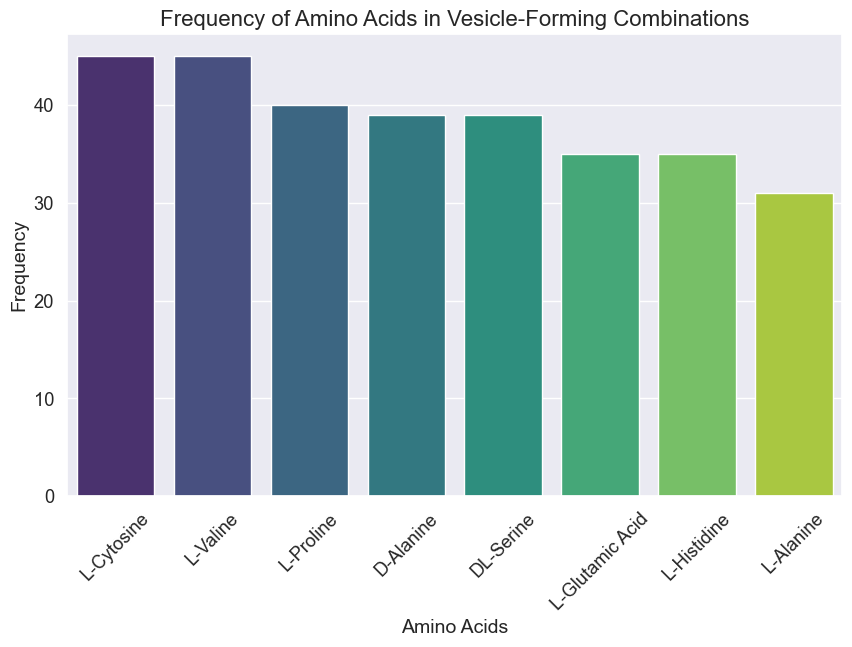

/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_56469/3787166490.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='pair', data=pair_counts_df, palette='coolwarm', orient='h')


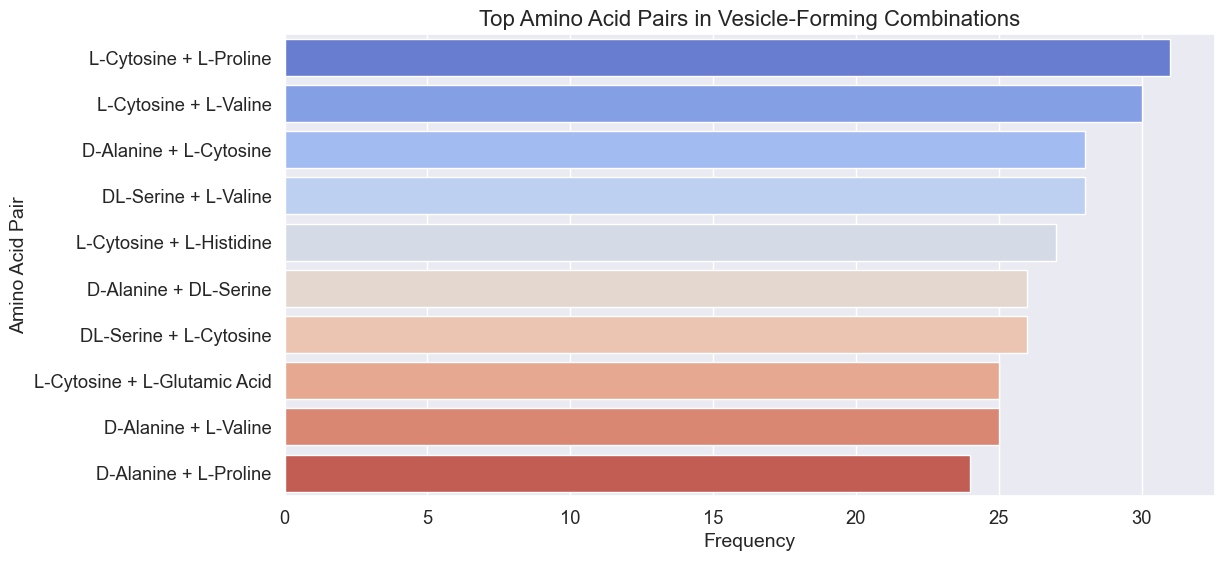

In [44]:
# Filter for combinations that form vesicles
vesicle_forming = df[df['num_vesicles'] == 1]

# Count individual amino acid contributions
aa_counts = vesicle_forming[aa_columns].sum().sort_values(ascending=False)

# Plotting amino acid contributions
plt.figure(figsize=(10, 6))
sns.barplot(x=aa_counts.index, y=aa_counts.values, palette='viridis')
plt.title('Frequency of Amino Acids in Vesicle-Forming Combinations', fontsize=16)
plt.xlabel('Amino Acids', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Pairwise analysis: Frequency of pairs in vesicle-forming combinations
from itertools import combinations

pair_counts = {}
for row in vesicle_forming[aa_columns].values:
    present_amino_acids = [aa_columns[i] for i, val in enumerate(row) if val == 1]
    for pair in combinations(present_amino_acids, 2):
        pair_counts[pair] = pair_counts.get(pair, 0) + 1

# Convert to a DataFrame for visualization
pair_counts_df = pd.DataFrame(
    [{'pair': ' + '.join(pair), 'count': count} for pair, count in pair_counts.items()]
).sort_values(by='count', ascending=False).head(10)

# Plotting top pairs
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='pair', data=pair_counts_df, palette='coolwarm', orient='h')
plt.title('Top Amino Acid Pairs in Vesicle-Forming Combinations', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Amino Acid Pair', fontsize=14)
plt.show()


In [45]:
pair_counts

{('L-Glutamic Acid', 'L-Valine'): 22,
 ('L-Cytosine', 'L-Valine'): 30,
 ('DL-Serine', 'L-Valine'): 28,
 ('D-Alanine', 'L-Histidine'): 19,
 ('D-Alanine', 'L-Proline'): 24,
 ('L-Histidine', 'L-Proline'): 23,
 ('D-Alanine', 'L-Valine'): 25,
 ('L-Proline', 'L-Valine'): 24,
 ('D-Alanine', 'DL-Serine'): 26,
 ('L-Alanine', 'L-Glutamic Acid'): 20,
 ('L-Alanine', 'L-Proline'): 19,
 ('L-Glutamic Acid', 'L-Proline'): 23,
 ('DL-Serine', 'L-Alanine'): 19,
 ('L-Alanine', 'L-Valine'): 21,
 ('D-Alanine', 'L-Alanine'): 18,
 ('D-Alanine', 'L-Glutamic Acid'): 19,
 ('DL-Serine', 'L-Glutamic Acid'): 19,
 ('D-Alanine', 'L-Cytosine'): 28,
 ('L-Alanine', 'L-Cytosine'): 21,
 ('L-Cytosine', 'L-Histidine'): 27,
 ('L-Cytosine', 'L-Proline'): 31,
 ('L-Histidine', 'L-Valine'): 22,
 ('DL-Serine', 'L-Cytosine'): 26,
 ('DL-Serine', 'L-Proline'): 20,
 ('L-Alanine', 'L-Histidine'): 16,
 ('L-Glutamic Acid', 'L-Histidine'): 22,
 ('DL-Serine', 'L-Histidine'): 21,
 ('L-Cytosine', 'L-Glutamic Acid'): 25}

In [48]:
df_model

,D-Alanine,DL-Serine,L-Alanine,L-Cytosine,L-Glutamic Acid,L-Histidine,L-Proline,L-Valine,num_vesicles,active_aa_count
0,1,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
250,1,1,1,1,1,0,1,1,0,7
251,1,1,1,1,1,1,0,1,0,7
252,1,1,0,1,1,1,1,1,0,7
253,0,1,1,1,1,1,1,1,1,7


In [49]:
vesicle_trend

active_aa_count
1    0.000000
2    0.107143
3    0.089286
4    0.242857
5    0.303571
6    0.678571
7    0.375000
8    0.000000
Name: num_vesicles, dtype: float64

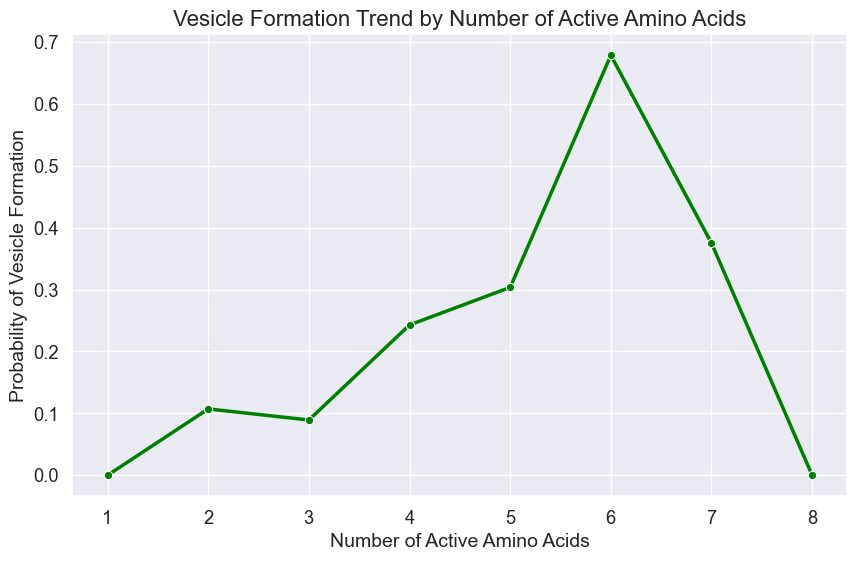

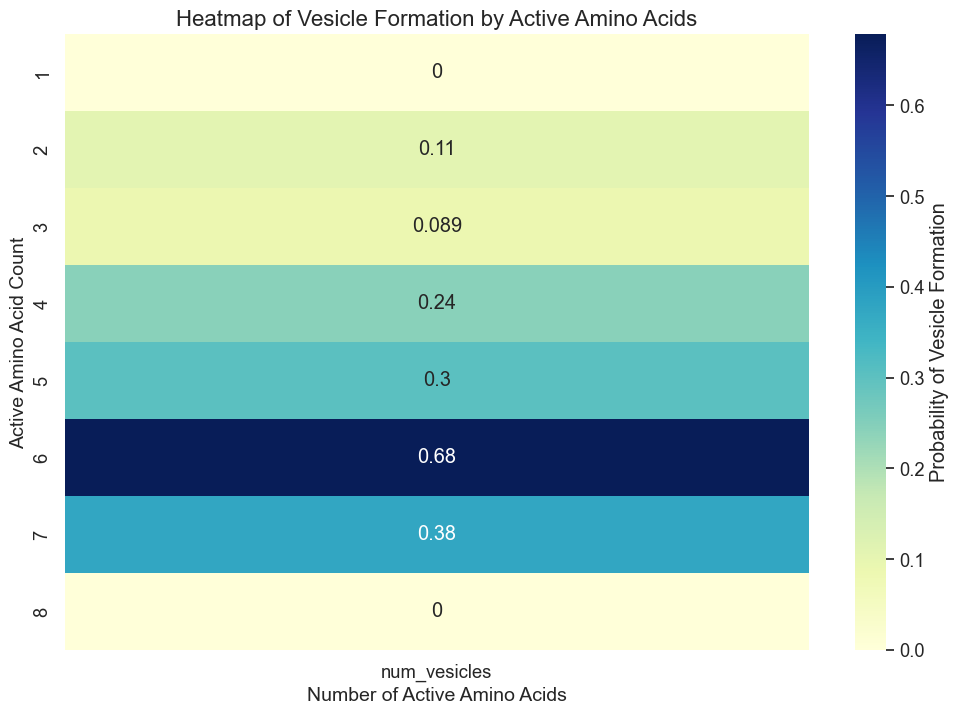

In [47]:
# Add a column for the count of active amino acids (1s in the row)
df_model['active_aa_count'] = df_model[aa_columns].sum(axis=1)

# Group by 'active_aa_count' and calculate the vesicle formation rate
vesicle_trend = df_model.groupby('active_aa_count')['num_vesicles'].mean()

# Plotting the vesicle formation trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=vesicle_trend.index, y=vesicle_trend.values, marker='o', linewidth=2.5, color='green')
plt.title('Vesicle Formation Trend by Number of Active Amino Acids', fontsize=16)
plt.xlabel('Number of Active Amino Acids', fontsize=14)
plt.ylabel('Probability of Vesicle Formation', fontsize=14)
plt.grid(True)
plt.show()

# Heatmap for data distribution
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_model.pivot_table(index='active_aa_count', values='num_vesicles', aggfunc='mean'),
    annot=True, cmap='YlGnBu', cbar_kws={'label': 'Probability of Vesicle Formation'}
)
plt.title('Heatmap of Vesicle Formation by Active Amino Acids', fontsize=16)
plt.xlabel('Number of Active Amino Acids', fontsize=14)
plt.ylabel('Active Amino Acid Count', fontsize=14)
plt.show()
